In [ ]:
from sklearn.cluster import AffinityPropagation
import numpy as np
import pandas as pd
from sklearn.datasets import load_digits
from sklearn.metrics import confusion_matrix
from sklearn import metrics

In [ ]:
X, y = load_digits(return_X_y=True)

In [ ]:
af = AffinityPropagation(convergence_iter=10, preference = -50000, damping=0.9 , random_state=0) .fit(X)

In [ ]:
cluster_centers_indices = af.cluster_centers_indices_
labels = af.labels_
print(labels)

In [ ]:
n_clusters_ = len(cluster_centers_indices)
print("Estimated number of clusters: %d" % n_clusters_)

In [ ]:
confusion_matrix = confusion_matrix(y, labels)
print(confusion_matrix)

In [48]:
FM_score = metrics.fowlkes_mallows_score(y, labels)
print("Fowlkes-Mallows score: ", FM_score)

Fowlkes-Mallows score:  0.685334082194355


64


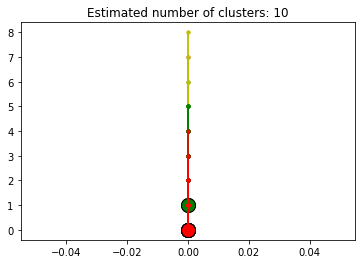

In [36]:
# Plot result
import matplotlib.pyplot as plt
from itertools import cycle

plt.close("all")
plt.figure(1)
plt.clf()

colors = cycle("bgrcmykbgrcmykbgrcmykbgrcmyk")
for k, col in zip(range(n_clusters_), colors):
    class_members = labels == k
    cluster_center = X[cluster_centers_indices[k]]

    plt.plot(X[class_members, 0], X[class_members, 1], col + ".")
    plt.plot(
        cluster_center[0],
        cluster_center[1],
        "o",
        markerfacecolor=col,
        markeredgecolor="k",
        markersize=14,
    )
    for x in X[class_members]:
        plt.plot([cluster_center[0], x[0]], [cluster_center[1], x[1]], col)

plt.title("Estimated number of clusters: %d" % n_clusters_)
plt.show()

In [ ]:
from scipy import ndimage
from sklearn import manifold

def n_images(X, y):
    shift_image = lambda x: ndimage.shift(
        x.reshape((8, 8)), 0.3 * np.random.normal(size=2), mode="constant"
    ).ravel()
    X = np.concatenate([X, np.apply_along_axis(shift_image, 1, X)])
    Y = np.concatenate([y, y], axis=0)
    return X, Y


np.random.seed(0)


X, y = n_images(X, y)


def plot_clustering(X_r, labels, title=None):
    x_min, x_max = np.min(X_r, axis=0), np.max(X_r, axis=0)
    X_r = (X_r - x_min) / (x_max - x_min)

    plt.figure(figsize=(6, 4))
    for i in range(X_r.shape[0]):
        plt.text(
            X_r[i, 0],
            X_r[i, 1],
            str(y[i]),
            color=plt.cm.nipy_spectral(labels[i] / 10.0),
            fontdict={"weight": "bold", "size": 9},
        )

    plt.xticks([])
    plt.yticks([])
    if title is not None:
        plt.title(title, size=17)
    plt.axis("off")
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])


X_r = manifold.SpectralEmbedding(n_components=2).fit_transform(X)


af = AffinityPropagation(convergence_iter=10, preference = -50000, damping=0.9 , random_state=0) .fit(X_r)



plot_clustering(X_r, af.labels_)

plt.show()